# SNR til 1kHz

SNR: 29.77 dB


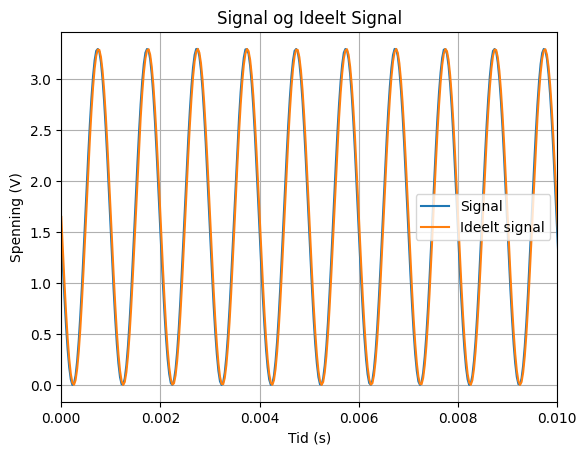

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from raspi_import import raspi_import

channels = 3 
freqIn = 1000   
periodsCount = 10
periodTime = 1 / freqIn 
rangePeriod = periodsCount * periodTime 
sample_period, data = raspi_import(f'Målinger/test4.bin', channels)

time_axis = np.arange(data.shape[0]) * sample_period
# Konverteringsfunksjon
C = 3.3  
def converter(data): 
    resolution = 2**12
    Vconv = (C / resolution * data)
    return Vconv


# Generer det ideelle signalet med samme lengde som data
f_ideal = 1.65 * (-np.sin(2 * np.pi * freqIn * time_axis)) + 1.65

signal = converter(data[:, 0])

noise = signal - f_ideal

signal_rms = np.sqrt(np.mean(signal**2))
noise_rms = np.sqrt(np.mean(noise**2))

SNR = 20 * np.log10(signal_rms / noise_rms)

print(f'SNR: {SNR:.2f} dB')

plt.plot(time_axis, signal, label='Signal')
plt.plot(time_axis, f_ideal, label='Ideelt signal')
plt.xlabel('Tid (s)')
plt.ylabel('Spenning (V)')
plt.title('Signal og Ideelt Signal')
plt.legend()
plt.grid()
plt.xlim(0, rangePeriod)
plt.show()




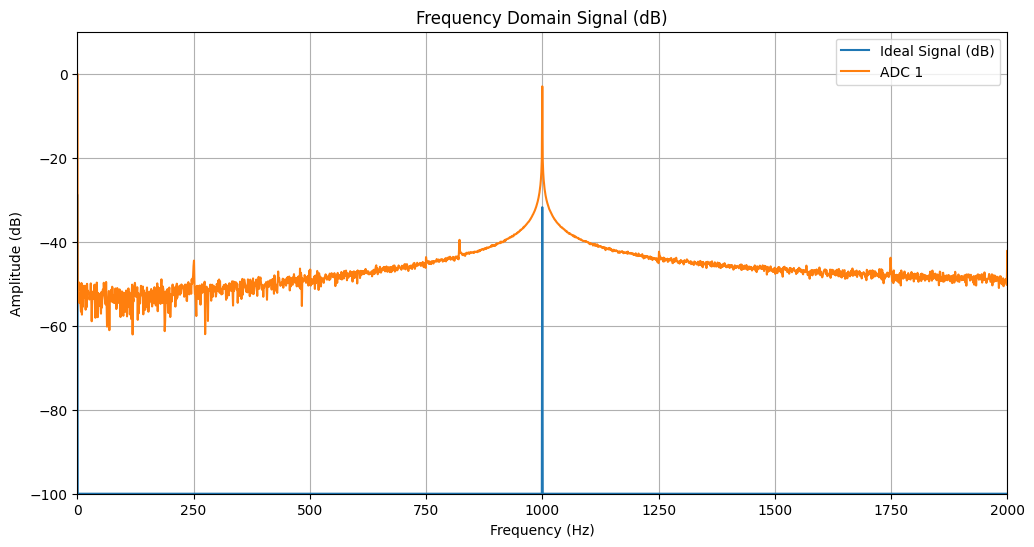

SNR: 151.79 dB


In [36]:

# Beregn FFT for det ideelle signalet
f_ideal_converted = converter(f_ideal)
fft_ideal = np.fft.fft(f_ideal_converted)
fft_ideal = np.fft.fftshift(fft_ideal)  # Skift for å sentrere frekvensspekteret
fft_ideal = np.abs(fft_ideal) / len(f_ideal_converted)  # Normaliser FFT-resultatet

# Konverter amplituden til dB
fft_ideal_db = 10 * np.log10(fft_ideal + 1e-10)  # Legg til en liten verdi for å unngå log(0)

# Frekvensaksen
frequencies = np.fft.fftfreq(len(f_ideal_converted), d=sample_period)
frequencies = np.fft.fftshift(frequencies)  # Skift frekvensaksen


# Beregn FFT for målt data
N = len(data)
fft_data = []
frequencies = np.fft.fftfreq(data.shape[0], d=sample_period)
frequencies = np.fft.fftshift(frequencies)  
for i in range(channels):
    signal = converter(data[:, i]) 
    fft_result = np.fft.fft(signal, n=N)  
    fft_result = np.fft.fftshift(fft_result)
    fft_data.append(np.abs(fft_result))  

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_ideal_db, label='Ideal Signal (dB)')

max_value = np.max(10 * np.log10(fft_data[0] + 1e-10))
plt.plot(frequencies, 10 * np.log10(fft_data[0] + 1e-10) - max_value, label=f'ADC {1}')

plt.title('Frequency Domain Signal (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.xlim(0, 2000)
plt.ylim(-100, 10)  # Juster y-aksen for dB-skala
plt.grid()
plt.show()

# Beregn SNR
SNR = 10 * np.log10(np.mean(fft_data[0]**2) / np.mean(fft_ideal**2))
print(f'SNR: {SNR:.2f} dB')